XOR문제를 해결하기 위해 등장 다층 퍼셉트론!


In [3]:
from sklearn.linear_model import Perceptron

# 샘플과 레이블이다. 
X = [[0,0],[0,1],[1,0],[1,1]]
y = [0, 0, 0, 1]

# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의시드이다.
clf = Perceptron(tol=1e-3, random_state=0)

# 학습을 수행한다. 
clf.fit(X, y)

# 테스트를 수행한다. 
print(clf.predict(X))

[0 0 0 1]


In [8]:
import numpy as np
# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1
# 퍼셉트론
def MLP(x,w,b):
    y = np.sum(w*x)+b
    if y <= 0:
        return 0
    else:
        return 1
# NAND 게이트
def NAND(x1,x2):
    return MLP(np.array([x1, x2]), w11, b1)
# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)
# AND 게이트
def AND(x1,x2):
    return MLP(np.array([x1, x2]), w2, b3)
# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))
# x1, x2 값을 번갈아 대입해 가며 최종값 출력
if __name__ == '__main__':
    for x in [(0,0),(1,0),(0,1),(1,1)]:
        y = XOR(x[0], x[1])
        print("입력 값: " + str(x) + " 출력 값: " + str(y))

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0


In [13]:
x = 10
learning_rate = 0.01 
precision = 0.00001
max_iterations = 100


# 손실 함수를 람다식으로 정의한다. 
loss_func = lambda x: (x-3)**2 + 10

# 그래디언트를 람다식으로 정의한다. 손실 함수의 1차 미분값이다. 
gradient = lambda x: 2*x-6

# 그래디언트 강하법
for i in range(max_iterations):
    x = x - learning_rate * gradient(x)
    print("손실 함수값(", x, ")=", loss_func(x))

print("MIN : ", x)

손실 함수값( 9.86 )= 57.05959999999999
손실 함수값( 9.7228 )= 55.19603983999999
손실 함수값( 9.588344 )= 53.40627666233599
손실 함수값( 9.456577119999999 )= 51.68738810650748
손실 함수값( 9.327445577599999 )= 50.03656753748979
손실 함수값( 9.200896666048 )= 48.45111946300519
손실 함수값( 9.076878732727039 )= 46.92845513227018
손실 함수값( 8.955341158072498 )= 45.46608830903228
손실 함수값( 8.836234334911047 )= 44.061631211994595
손실 함수값( 8.719509648212826 )= 42.7127906159996
손실 함수값( 8.60511945524857 )= 41.41736410760602
손실 함수값( 8.493017066143599 )= 40.17323648894484
손실 함수값( 8.383156724820727 )= 38.97837632398262
손실 함수값( 8.275493590324313 )= 37.830832621552915
손실 함수값( 8.169983718517827 )= 36.728731649739416
손실 함수값( 8.06658404414747 )= 35.67027387640974
손실 함수값( 7.965252363264521 )= 34.65373103090391
손실 함수값( 7.865947315999231 )= 33.67744328208012
손실 함수값( 7.768628369679246 )= 32.73981652810974
손실 함수값( 7.673255802285661 )= 31.839319793596598
손실 함수값( 7.579790686239948 )= 30.97448272977017
손실 함수값( 7.488194872515149 )= 30.143893213671276


In [20]:
import numpy as np
def MSE(y,t):
    return 0.5 * np.sum((y-t)**2)

t = np.array([0,0,0,0.5,0.5,0,0,0,0,0])
y = np.array([0.01,0.01,0.1,0.3,0.33,0.04,0.02,0.05,0.01,0.1])
y_1 = np.array([0.3,0.01,0.1,0.3,0.33,0.04,0.02,0.05,0.01,0.1])

#교차 엔트로피 
def CEE(y,t) :
    delta = 1e-10 
    return -np.sum(t*np.log(y+delta))

print(MSE(t,y))
print(CEE(t,y))
print(CEE(t,y_1))

0.04685
8.265472039806522
14.942968809489255


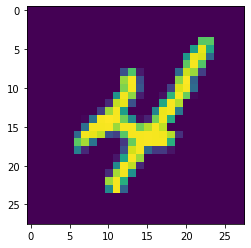

In [41]:
import tensorflow as tf

(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[9])

* 참고 
https://www.tensorflow.org/api_docs/python/tf/keras/Model 

In [58]:
batch_size = 128 # 가중치를 변경하기 전에 처리하는 샘플의 개수
num_classes = 10 # 출력 클래스의 개수
epochs = 1000 # 에포크의 개수

# 데이터를 학습 데이터와 테스트 데이터로 나눈다. 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 입력 이미지를 2차원에서 1차원 벡터로 변경한다. 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 입력 이미지의 픽셀 값이 0.0에서 1.0 사이의 값이 되게 한다. 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [59]:
# 클래스의 개수에 따라서 하나의 출력 픽셀만이 1이 되게 한다. 
# 예를 들면 1 0 0 0 0 0 0 0 0 0과 같다.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 신경망의 모델을 구축한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(tf.keras.layers.Dense(num_classes, activation='sigmoid'))
model.summary()
sgd = tf.keras.optimizers.SGD(lr=0.1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [60]:

# 손실 함수를 제곱 오차 함수로 설정하고 학습 알고리즘은 SGD방식으로 한다.
model.compile(loss = 'mean_squared_error', optimizer = sgd, metrics= ['accuracy'])

# 학습을 수행한다.
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

# 학습을 평가한다.
score =  model.evaluate(x_test, y_test, verbose=1)
print('테스트 손실값: ', score[0])
print('테스트 정확도: ', score[1])

Epoch 1/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.1677
Epoch 2/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.3631
Epoch 3/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.4868
Epoch 4/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.5950
Epoch 5/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0681 - accuracy: 0.6607
Epoch 6/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.7018
Epoch 7/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0573 - accuracy: 0.7376
Epoch 8/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0533 - accuracy: 0.7650
Epoch 9/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0497 - accuracy: 0.7830
Epoch 10/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.046

469/469 [==============================] - 1s 2ms/step - loss: 0.0175 - accuracy: 0.9061
Epoch 159/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0175 - accuracy: 0.9072
Epoch 160/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0174 - accuracy: 0.9076
Epoch 161/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0174 - accuracy: 0.9075
Epoch 162/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0174 - accuracy: 0.9068
Epoch 163/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0172 - accuracy: 0.9090
Epoch 164/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.9078
Epoch 165/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.9062
Epoch 166/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0175 - accuracy: 0.9052
Epoch 167/1000
469/469 [==============================] - 1s 2ms/step - loss: 0

469/469 [==============================] - 1s 2ms/step - loss: 0.0148 - accuracy: 0.9199
Epoch 315/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9198
Epoch 316/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9224
Epoch 317/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9199
Epoch 318/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0148 - accuracy: 0.9197
Epoch 319/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0148 - accuracy: 0.9211
Epoch 320/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9202
Epoch 321/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9228
Epoch 322/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9216
Epoch 323/1000
469/469 [==============================] - 1s 2ms/step - loss: 0

469/469 [==============================] - 1s 2ms/step - loss: 0.0129 - accuracy: 0.9290
Epoch 471/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0126 - accuracy: 0.9307
Epoch 472/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0126 - accuracy: 0.9321
Epoch 473/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0124 - accuracy: 0.9326
Epoch 474/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0125 - accuracy: 0.9306
Epoch 475/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0124 - accuracy: 0.9319
Epoch 476/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0126 - accuracy: 0.9307
Epoch 477/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0126 - accuracy: 0.9309
Epoch 478/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0125 - accuracy: 0.9309
Epoch 479/1000
469/469 [==============================] - 1s 2ms/step - loss: 0

469/469 [==============================] - 1s 2ms/step - loss: 0.0112 - accuracy: 0.9386
Epoch 627/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0112 - accuracy: 0.9383
Epoch 628/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9396
Epoch 629/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0112 - accuracy: 0.9384
Epoch 630/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0111 - accuracy: 0.9383
Epoch 631/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0111 - accuracy: 0.9386
Epoch 632/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0111 - accuracy: 0.9392
Epoch 633/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0109 - accuracy: 0.9406
Epoch 634/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9402
Epoch 635/1000
469/469 [==============================] - 1s 2ms/step - loss: 0

469/469 [==============================] - 1s 2ms/step - loss: 0.0096 - accuracy: 0.9480
Epoch 783/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0099 - accuracy: 0.9470
Epoch 784/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0099 - accuracy: 0.9453
Epoch 785/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0099 - accuracy: 0.9453
Epoch 786/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0098 - accuracy: 0.9460
Epoch 787/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0099 - accuracy: 0.9456
Epoch 788/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0097 - accuracy: 0.9469
Epoch 789/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0098 - accuracy: 0.9471
Epoch 790/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0098 - accuracy: 0.9469
Epoch 791/1000
469/469 [==============================] - 1s 2ms/step - loss: 0

469/469 [==============================] - 1s 2ms/step - loss: 0.0086 - accuracy: 0.9536
Epoch 939/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9540
Epoch 940/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0088 - accuracy: 0.9523
Epoch 941/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0091 - accuracy: 0.9496
Epoch 942/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9536
Epoch 943/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9530
Epoch 944/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0090 - accuracy: 0.9507
Epoch 945/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9532
Epoch 946/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0088 - accuracy: 0.9521
Epoch 947/1000
469/469 [==============================] - 1s 2ms/step - loss: 0